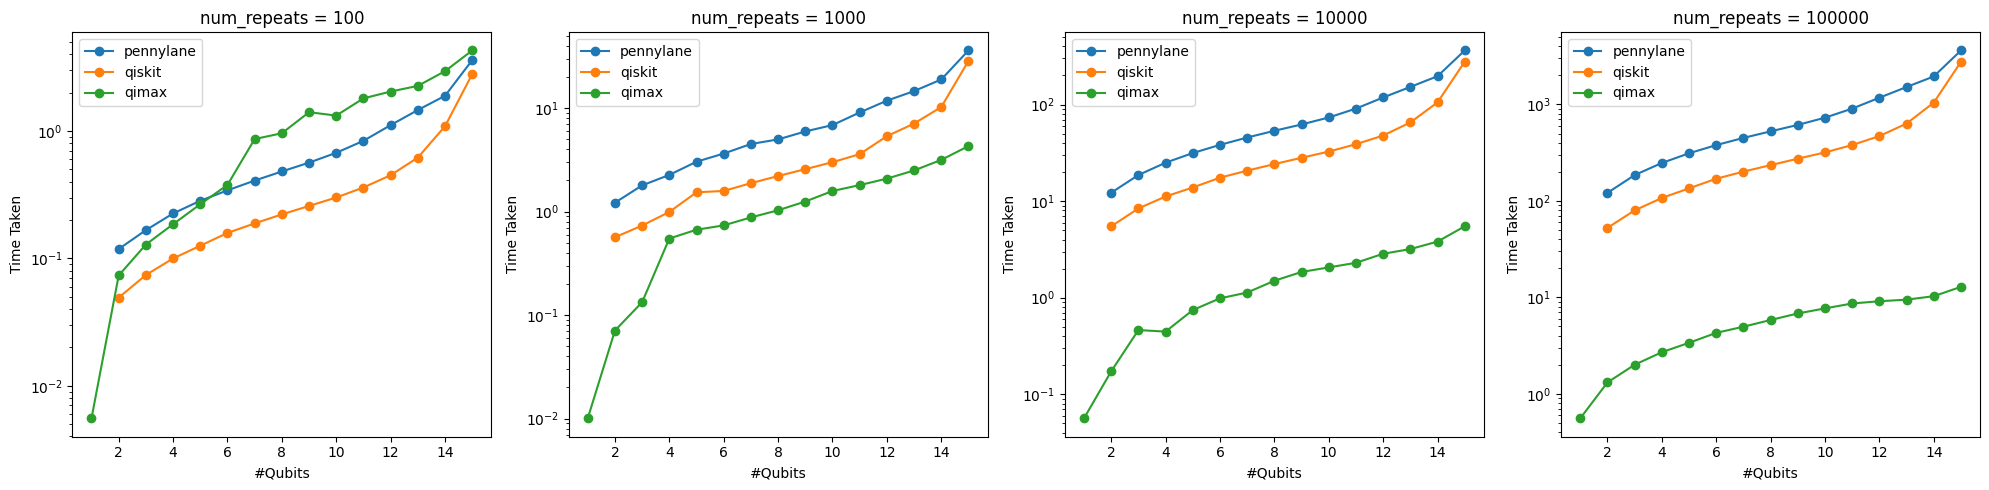

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV files
pennylane = pd.read_csv('time_num_layers2_xyzcx_pennylane.csv')
qiskit = pd.read_csv('time_num_layers2_xyzcx_qiskit.csv')
qimax = pd.read_csv('time_num_layers2_xyzcx_qimax.csv')

# Define the unique num_repeats values for subplots
num_repeats_values = [100, 1000, 10000, 100000]

# Create subplots
fig, axes = plt.subplots(1, len(num_repeats_values), figsize=(20, 5))

# Plot data from each file
for i, num_repeats in enumerate(num_repeats_values):
	ax = axes[i]
	for file, label in zip([pennylane, qiskit, qimax], ['pennylane', 'qiskit', 'qimax']):
		subset = file[file['num_repeats'] == num_repeats]
		ax.plot(subset['num_qubits'], subset['time_taken'], marker='o', linestyle='-', label=label)
	ax.set_title(f'num_repeats = {num_repeats}')
	ax.set_xlabel('#Qubits')
	ax.set_ylabel('Time Taken')
	ax.set_yscale('log')
	ax.legend()

plt.tight_layout()
plt.show()
